In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('data.csv')

## Concatenate the Data Frames
X=data.iloc[:,3:13]
Y=data.iloc[:,13]

In [4]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)


In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.layers import BatchNormalization


In [7]:
classifier=Sequential()
classifier.add(Dense(units=6,kernel_initializer='lecun_normal',activation='relu',input_dim=11))
classifier.add(BatchNormalization())
classifier.add(Dense(units=6,kernel_initializer='lecun_normal',activation='selu'))
classifier.add(BatchNormalization())
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [18]:
model=classifier.fit(X_train,Y_train,validation_split=0.2,batch_size=64,epochs=100)

Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8678 - val_loss: 0.3598 - val_accuracy: 0.8487
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8680 - val_loss: 0.3591 - val_accuracy: 0.8494
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8687 - val_loss: 0.3589 - val_accuracy: 0.8494
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8664 - val_loss: 0.3576 - val_accuracy: 0.8475
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8686 - val_loss: 0.3646 - val_accuracy: 0.8475
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8658 - val_loss: 0.3633 - val_accuracy: 0.8481
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8667 - val_loss: 0.3594 - val_accuracy: 0.8506

Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8695 - val_loss: 0.3575 - val_accuracy: 0.8494
Epoch 59/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8692 - val_loss: 0.3586 - val_accuracy: 0.8500
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8681 - val_loss: 0.3602 - val_accuracy: 0.8531
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8667 - val_loss: 0.3618 - val_accuracy: 0.8481
Epoch 62/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8672 - val_loss: 0.3602 - val_accuracy: 0.8487
Epoch 63/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8658 - val_loss: 0.3628 - val_accuracy: 0.8487
Epoch 64/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8653 - val_loss: 0.3588 - val_accuracy:

In [19]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

63/63 [==============================] - 0s 1ms/step


0.8565

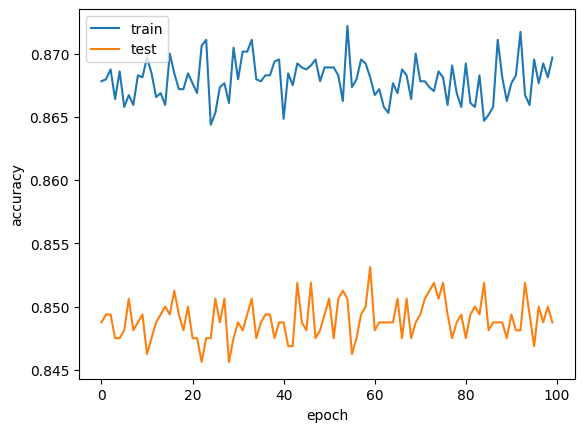

In [20]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [22]:
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [ ]:
# keras Tuner
def build_model(hp):
    model=keras.Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int('num_layers',2,10)):
        model.add(
        Dense(
        units=hp.Int(f'units_{i}',min_value=32,max_value=128,step=32),
        activation='relu',
        kernel_initializer='he_uniform')
        )
        model.add(BatchNormalization())

    #if hp.Boolean('dropout'):
    #    model.add(layers.Dropout(rate=0.25))
    model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))
    learning_rate = 0.001
    model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
    )
    return model

In [25]:
tuner = RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=5,
    overwrite=True,
    directory="Project_1",
    project_name="Test",
)

In [ ]:
tuner.search(X_train, Y_train, epochs=10,validation_split=0.2,batch_size=64)

Trial 8 Complete [00h 00m 21s]
val_accuracy: 0.8482499957084656

Best val_accuracy So Far: 0.8516250014305115
Total elapsed time: 00h 04m 06s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
6                 |6                 |num_layers
64                |96                |units_0
96                |64                |units_1
96                |128               |units_2
64                |96                |units_3
32                |32                |units_4
64                |128               |units_5
96                |32                |units_6
32                |64                |units_7

Epoch 1/10
100/100 [==============================] - 2s 9ms/step - loss: 0.5268 - accuracy: 0.7606 - val_loss: 0.4060 - val_accuracy: 0.8356
Epoch 2/10
100/100 [==============================] - 1s 6ms/step - loss: 0.3733 - accuracy: 0.8547 - val_loss: 0.3792 - val_accuracy: 0.8462
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: 0.

In [254]:
tuner.results_summary()

Results summary
Results in Project_1\Test
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
num_layers: 6
units_0: 64
units_1: 64
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 0.8568750023841858

Trial 01 summary
Hyperparameters:
num_layers: 2
units_0: 32
units_1: 96
units_2: 96
units_3: 128
units_4: 64
units_5: 32


In [255]:
models = tuner.get_best_models(num_models=5)
best_model = models[0]
best_model.build(input_shape=(None,11))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [260]:
y_pred=best_model.predict(X_test)
y_pred=(y_pred>0.5)
score=accuracy_score(y_pred,Y_test)
score

63/63 [==============================] - 0s 2ms/step


0.842